## Статистический анализ данных

### Определение перспективного тарифа для телеком-компании

Описание проекта:  
Клиентам федерального оператора сотовой связи предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


ВЫВОДЫ:  
1) В тариф ульра включено 3000 мин , их никто не выговаривает даже близко. Предлагаю сократить до 1000.  
2) Тоже самое с сообщениями. В тариф ульра включено 1000 сообщений , их никто не использует. Предлагаю сократить до 150.  
3) как мы видим у многих пользователей перерасход по интернету, возможно для увелич выручки следует увеличить сумму за Гб сверх тарифного пакета.  
4) средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, возможно стоит увеличить цену тарифа в Москве, т к мы понимаем что средний доход в Москве больше</font>

**<font color='green'>Шаг 1 Откройте файл с данными и изучите общую информацию**</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats as st
calls = pd.read_csv('/datasets/calls.csv')
print(calls.head())
#print(calls.info())
calls.isna().sum()

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000


id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [2]:
internet = pd.read_csv('/datasets/internet.csv')
print(internet.head())
#print(internet.info())

       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000


In [3]:
messages = pd.read_csv('/datasets/messages.csv')
print(messages.head())
#print(messages.info())

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


In [4]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [5]:
print(tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes
None


**если значение пропущено - тариф еще действует.  
заменил значение на 1 в столбце ['churn_date']**

In [6]:
users = pd.read_csv('/datasets/users.csv')
#print(users.head())
print(users.isna().sum())
users['churn_date'] = users['churn_date'].fillna(value = 1)

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


In [7]:
users.info()
#print(users['churn_date'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


In [8]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,1,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,1,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,1,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,1,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**заменил значения длительность — 0.0 минут на 1**

In [9]:
# заменил значения длительность — 0.0 минут на 1
calls.loc[(calls['duration'] == 0 ),'duration'] = 1 

In [10]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.00,1000
1,1000_1,2018-08-17,1.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**обрабатываю дату**

In [11]:
# переводим в формат дата
calls['date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

# добавляем номер месяца

calls['month'] = calls['date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [12]:
table_c = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['sum']).fillna(0)

In [13]:
table_c.head()

sum
              duration
user_id month         
1000    5       155.06
        6       173.90
        7       324.80
        8       399.87
        9       452.14

In [14]:
table_i = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum']).fillna(0)

In [15]:
table_i.head()

sum
                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

In [16]:
table_m = messages.pivot_table(index=['user_id','month'], values='id', aggfunc=['count']).fillna(0)

In [17]:
table_m.head()

count
                 id
user_id month      
1000    5        22
        6        60
        7        75
        8        81
        9        57

**<font color='blue'>соединяю три таблицы**</font>

In [18]:
new_table = table_c.join([table_i,table_m], how = 'outer').fillna(0)

In [19]:
new_table.head()

sum           count
              duration   mb_used    id
user_id month                         
1000    5       155.06   2253.49  22.0
        6       173.90  23233.77  60.0
        7       324.80  14003.64  75.0
        8       399.87  14055.93  81.0
        9       452.14  14568.91  57.0

In [20]:
new_table.columns = ['duration','mb_used','count']

In [21]:
new_table.reset_index(inplace=True)

In [22]:
new_table.head()   

,user_id,month,duration,mb_used,count
0,1000,5,155.06,2253.49,22.0
1,1000,6,173.90,23233.77,60.0
2,1000,7,324.80,14003.64,75.0
3,1000,8,399.87,14055.93,81.0
4,1000,9,452.14,14568.91,57.0


In [23]:
new_table.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id     3214 non-null int64
month       3214 non-null int64
duration    3214 non-null float64
mb_used     3214 non-null float64
count       3214 non-null float64
dtypes: float64(3), int64(2)
memory usage: 125.6 KB


**<font color='blue'>присоединяю таблицы users и затем tariffs**</font>

In [24]:
new_table1 = pd.merge(new_table, users, on='user_id', how='left')

In [25]:
new_table1.head()

,user_id,month,duration,mb_used,count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,155.06,2253.49,22.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,173.90,23233.77,60.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,324.80,14003.64,75.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,399.87,14055.93,81.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,452.14,14568.91,57.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [26]:
new_table2 = pd.merge(new_table1, tariffs, right_on  ='tariff_name', left_on ='tariff' , how='left')

In [27]:
new_table2.head()

,user_id,month,duration,mb_used,count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,155.06,2253.49,22.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,173.90,23233.77,60.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,324.80,14003.64,75.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,399.87,14055.93,81.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,452.14,14568.91,57.0,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


**<font color='blue'>вычисляю income, через оперции со столбцами**</font>

In [28]:
new_table2['money_over_min']  = new_table2['minutes_included'] - new_table2['duration']
new_table2.loc[(new_table2['money_over_min'] >= 0 ),'money_over_min'] = 0
new_table2.loc[(new_table2['money_over_min'] < 0 ),'money_over_min'] = new_table2['money_over_min']*new_table2['rub_per_minute']*(-1)

new_table2['money_over_mes']  = new_table2['messages_included'] - new_table2['count']
new_table2.loc[(new_table2['money_over_mes'] >= 0 ),'money_over_mes'] = 0
new_table2.loc[(new_table2['money_over_mes'] < 0 ),'money_over_mes'] = new_table2['money_over_mes']*new_table2['rub_per_message']*(-1)

new_table2['money_over_i']  = new_table2['mg_per_month_included'] - new_table2['mb_used']
new_table2.loc[(new_table2['money_over_i'] >= 0 ),'money_over_i'] = 0
new_table2.loc[(new_table2['money_over_i'] < 0 ),'money_over_i'] = new_table2['money_over_i']*(new_table2['rub_per_gb']/1024)*(-1)
 
new_table2['income'] = new_table2['money_over_min'] + new_table2['money_over_mes'] + new_table2['money_over_i'] + new_table2['rub_monthly_fee']

In [29]:
new_table2.head() 

,user_id,month,duration,mb_used,count,age,churn_date,city,first_name,last_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,money_over_min,money_over_mes,money_over_i,income
0,1000,5,155.06,2253.49,22.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
1,1000,6,173.90,23233.77,60.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
2,1000,7,324.80,14003.64,75.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
3,1000,8,399.87,14055.93,81.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
4,1000,9,452.14,14568.91,57.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0


**<font color='blue'>----------итоговая таблица--------------------------------------------------**</font>

**Шаг 3   
Опишите поведение клиентов оператора, исходя из выборки.**
1) сколько минут разговора  
2) сколько сообщений   
3) какой объём интернет-трафика  
**требуется пользователям каждого тарифа в месяц?       
Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения**

**<font color='blue'>Шаг 3 - начало**</font>

In [30]:
new_table2.head() 

,user_id,month,duration,mb_used,count,age,churn_date,city,first_name,last_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,money_over_min,money_over_mes,money_over_i,income
0,1000,5,155.06,2253.49,22.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
1,1000,6,173.90,23233.77,60.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
2,1000,7,324.80,14003.64,75.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
3,1000,8,399.87,14055.93,81.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
4,1000,9,452.14,14568.91,57.0,52,1,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0


**<font color='blue'>разделяю на тарифы**</font>

In [31]:
income_ultra = new_table2.query('tariff == "ultra"')
income_smart = new_table2.query('tariff == "smart"')

**<font color='blue'>по минутам**</font>

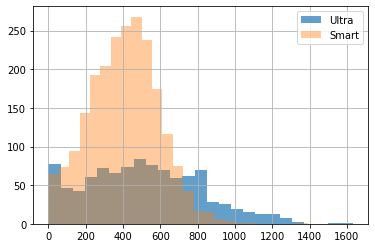

In [32]:
#код наставника
plot = income_ultra['duration'].hist(alpha = 0.7, bins = 25, label = 'Ultra')
plot = income_smart['duration'].hist(alpha = 0.4, bins = 25, label = 'Smart')
legend = plt.legend()

(0, 1500)

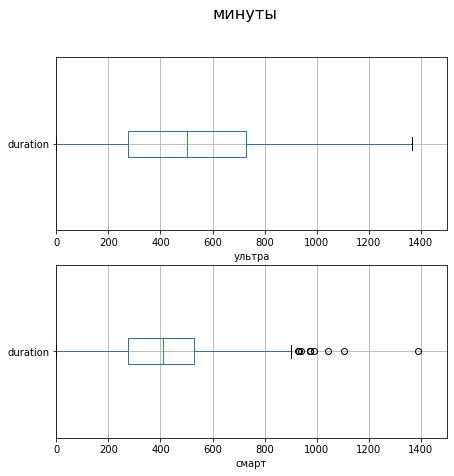

In [33]:
# попробовал нарисовать в одном окне
plt.subplots(figsize = (7, 7))
plt.suptitle('минуты', fontsize=16)
ax = plt.subplot(2, 1, 1)
income_ultra.boxplot('duration', vert = False) 
ax.set_xlabel('ультра')
ax.set_xlim(0,1500)
ax = plt.subplot(2, 1, 2)
plot = income_smart.boxplot('duration', vert = False) 
ax.set_xlabel('смарт')
ax.set_xlim(0,1500)

In [34]:
std = np.std(income_ultra['duration'])
std1 = np.std(income_smart['duration'])
print("сигма тарифа ULTRA =",std)
print("сигма тарифа SMART =",std1) 

сигма тарифа ULTRA = 307.8746993356335
сигма тарифа SMART = 184.47121062335216


In [35]:
income_ultra['duration'].describe()

count     985.000000
mean      511.224569
std       308.031100
min         0.000000
25%       276.030000
50%       502.550000
75%       730.050000
max      1632.060000
Name: duration, dtype: float64

In [36]:
income_smart['duration'].describe()

count    2229.000000
mean      405.942952
std       184.512604
min         0.000000
25%       274.230000
50%       410.560000
75%       529.510000
max      1390.220000
Name: duration, dtype: float64

непрерывное распределение  
ультра скошен вправо  
смарт скошен влево

медианное и среднее значения продолжительности разговора в тарифе ульра больше  
, но сигма тоже больше => разброс значений тарифа ультра больше, что мы видим на гистограмме

**<font color='blue'>по сообщениям**</font>

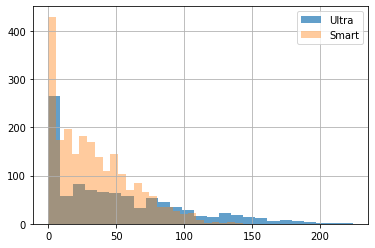

In [37]:
plot = income_ultra['count'].hist(alpha = 0.7, bins = 25, label = 'Ultra')
plot = income_smart['count'].hist(alpha = 0.4, bins = 25, label = 'Smart')
legend = plt.legend()

(0, 200)

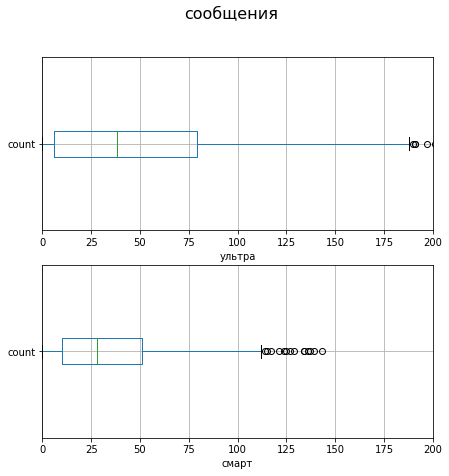

In [38]:
plt.subplots(figsize = (7, 7))
plt.suptitle('сообщения', fontsize=16)
ax = plt.subplot(2, 1, 1)
income_ultra.boxplot('count', vert = False) 
ax.set_xlabel('ультра')
ax.set_xlim(0, 200)
ax = plt.subplot(2, 1, 2)
plot = income_smart.boxplot('count', vert = False) 
ax.set_xlabel('смарт')
ax.set_xlim(0,200)

In [39]:
std = np.std(income_ultra['count'])
std1 = np.std(income_smart['count'])
print("сигма тарифа ULTRA =",std)
print("сигма тарифа SMART =",std1)      

сигма тарифа ULTRA = 47.78018496610161
сигма тарифа SMART = 28.221542886898938


In [40]:
income_ultra['count'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: count, dtype: float64

In [41]:
income_smart['count'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count, dtype: float64

дискретное распределение  
оба скошены вправо  
распределения похожи

**<font color='blue'>трафик**</font>

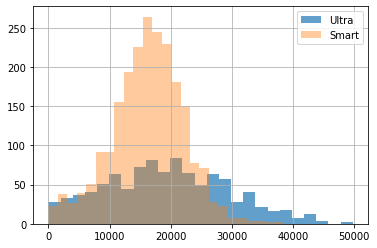

In [42]:
plot = income_ultra['mb_used'].hist(alpha = 0.7, bins = 25, label = 'Ultra')
plot = income_smart['mb_used'].hist(alpha = 0.4, bins = 25, label = 'Smart')
legend = plt.legend()

(0, 50000)

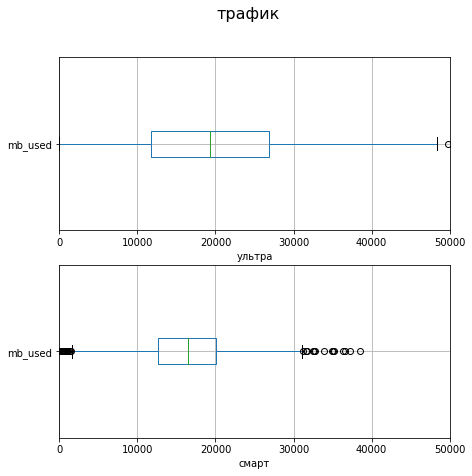

In [43]:
plt.subplots(figsize = (7, 7))
plt.suptitle('трафик', fontsize=16)
ax = plt.subplot(2, 1, 1)
income_ultra.boxplot('mb_used', vert = False) 
ax.set_xlabel('ультра')
ax.set_xlim(0, 50000)
ax = plt.subplot(2, 1, 2)
plot = income_smart.boxplot('mb_used', vert = False) 
ax.set_xlabel('смарт')
ax.set_xlim(0, 50000)

In [44]:
std_u = np.std(income_ultra['mb_used'])
std_s = np.std(income_smart['mb_used'])
print("сигма тарифа ULTRA =",std_u)
print("сигма тарифа SMART =",std_s) 

сигма тарифа ULTRA = 10082.049060669484
сигма тарифа SMART = 5869.159692433401


In [45]:
income_ultra['mb_used'].describe()

count      985.000000
mean     19468.805208
std      10087.170752
min          0.000000
25%      11770.260000
50%      19308.010000
75%      26837.690000
max      49745.690000
Name: mb_used, dtype: float64

In [46]:
income_smart['mb_used'].describe()

count     2229.000000
mean     16208.386990
std       5870.476681
min          0.000000
25%      12643.010000
50%      16506.840000
75%      20042.930000
max      38552.450000
Name: mb_used, dtype: float64

у обоих тарифов средняя совпадает с медианой  
ультра 19400  
смарт 16500  
но сигма у ультра больше, видно на гистограмме

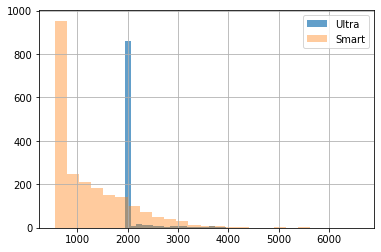

In [47]:
plot = income_ultra['income'].hist(alpha = 0.7, bins = 25, label = 'Ultra')
plot = income_smart['income'].hist(alpha = 0.4, bins = 25, label = 'Smart')
legend = plt.legend()

(0, 4000)

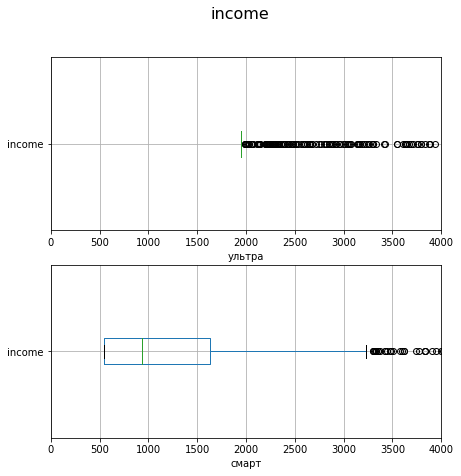

In [48]:
plt.subplots(figsize = (7, 7))
plt.suptitle('income', fontsize=16)
ax = plt.subplot(2, 1, 1)
income_ultra.boxplot('income', vert = False) 
ax.set_xlabel('ультра')
ax.set_xlim(0, 4000)
ax = plt.subplot(2, 1, 2)
plot = income_smart.boxplot('income', vert = False) 
ax.set_xlabel('смарт')
ax.set_xlim(0, 4000)

In [49]:
std_u = np.std(income_ultra['income'])
std_s = np.std(income_smart['income'])
print(std_u)
print(std_s)

354.70060129880517
775.6531715513461


In [50]:
income_ultra['income'].describe()

count     985.000000
mean     2059.868918
std       354.880790
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4736.966309
Name: income, dtype: float64

In [51]:
income_smart['income'].describe()

count    2229.000000
mean     1212.284028
std       775.827221
min       550.000000
25%       550.000000
50%       939.730469
75%      1628.200000
max      6596.875391
Name: income, dtype: float64

**<font color='blue'>Шаг 4  
Проверьте гипотезы  
1)средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются  
2)средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**</font> 

**1) нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается, т е выручки равны  
     альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, т е выручки не равны**

In [52]:
alpha = .05 

In [53]:
results = st.ttest_ind(
    income_ultra['income'], 
    income_smart['income'],
    equal_var = True)

In [54]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.488898524423297e-204
Отвергаем нулевую гипотезу


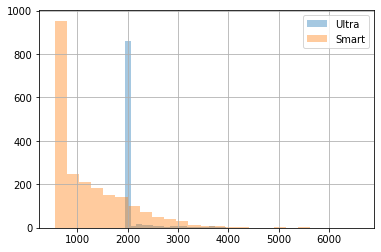

In [55]:
#код наставника
plot = income_ultra['income'].hist(alpha = 0.4, bins = 25, label = 'Ultra')
plot = income_smart['income'].hist(alpha = 0.4, bins = 25, label = 'Smart')
legend = plt.legend()

**<font color='blue'> 
отвергнули нулевую гипотезу , т е   
Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**</font> 

**2) нулевая гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, т е вуручки равны   
альтернативная гипотеза:  средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, т е вуручки не равны**

In [56]:
income_Msk = new_table2.query('city == "Москва"')

In [57]:
income_Other = new_table2.query('city != "Москва"')

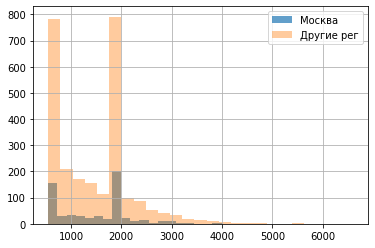

In [58]:
plot = income_Msk['income'].hist(alpha = 0.7, bins = 25, label = 'Москва')
plot = income_Other['income'].hist(alpha = 0.4, bins = 25, label = 'Другие рег')
legend = plt.legend()

In [59]:
results1 = st.ttest_ind(
    income_Msk['income'], 
    income_Other['income'],
    equal_var = True)

In [60]:
print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.44385558275062276
Не получилось отвергнуть нулевую гипотезу


**<font color='blue'> 
Не получилось отвергнуть нулевую гипотезу , т е она подтверждается  
Вывод: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, т е выручки равны**</font> 

ВЫВОДЫ:
1) В тариф ульра включено 3000 мин , их никто не выговаривает даже близко. Предлагаю сократить до 1000.  
2) Тоже самое с сообщениями. В тариф ульра включено 1000 сообщений , их никто не использует. Предлагаю сократить до 150.  
3) как мы видим у многих пользователей перерасход по интернету, возможно для увелич выручки следует увеличить сумму за Гб сверх тарифного пакета.  
4) средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, возможно стоит увеличить цену тарифа в Москве, т к мы понимаем что средний доход в Москве больше   